In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**IMPORT DATASET**

In [2]:
!wget 'https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/home-credit-indonesia/home-credit-default-risk.zip'

--2022-10-28 11:04:13--  https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/home-credit-indonesia/home-credit-default-risk.zip
Resolving rakamin-lms.s3.ap-southeast-1.amazonaws.com (rakamin-lms.s3.ap-southeast-1.amazonaws.com)... 52.219.164.7
Connecting to rakamin-lms.s3.ap-southeast-1.amazonaws.com (rakamin-lms.s3.ap-southeast-1.amazonaws.com)|52.219.164.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 721616255 (688M) [application/zip]
Saving to: ‘home-credit-default-risk.zip’

home-credit-default 100%[===================>] 688.19M  66.7MB/s    in 11s     

2022-10-28 11:04:24 (64.0 MB/s) - ‘home-credit-default-risk.zip’ saved [721616255/721616255]



In [3]:
!unzip 'home-credit-default-risk.zip'

Archive:  home-credit-default-risk.zip
  inflating: HomeCredit_columns_description.csv  
  inflating: POS_CASH_balance.csv    
  inflating: application_test.csv    
  inflating: application_train.csv   
  inflating: bureau.csv              
  inflating: bureau_balance.csv      
  inflating: credit_card_balance.csv  
  inflating: installments_payments.csv  
  inflating: previous_application.csv  
  inflating: sample_submission.csv   


In [4]:
!ls

application_test.csv		    home-credit-default-risk.zip
application_train.csv		    installments_payments.csv
bureau_balance.csv		    POS_CASH_balance.csv
bureau.csv			    previous_application.csv
credit_card_balance.csv		    sample_data
HomeCredit_columns_description.csv  sample_submission.csv


**DATA CLEANING & PROCESSING**

In [5]:
app_test = pd.read_csv('application_test.csv')
app_train= pd.read_csv('application_train.csv')
bur_b = pd.read_csv('bureau_balance.csv')
bur=pd.read_csv('bureau.csv')
cre_cardbal=pd.read_csv('credit_card_balance.csv')
inst_pay=pd.read_csv('installments_payments.csv')
cash_bal=pd.read_csv('POS_CASH_balance.csv')
prev_app=pd.read_csv('previous_application.csv')
samp_sub=pd.read_csv('sample_submission.csv')

In [6]:
app_test.info()
app_train.info()
bur_b.info() 
bur.info()
cre_cardbal.info()
inst_pay.info()
cash_bal.info()
prev_app.info()
samp_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE  

In [7]:
print(f'\n\tapp_test\n{app_test.isna().sum()}')
print(f'\napp_train\n{app_train.isna().sum()}')
print(f'\n\n{bur_b.isna().sum()}')
print(f'\n\n{bur.isna().sum()}')
print(f'\n\n{cre_cardbal.isna().sum()}')
print(f'\n\n{inst_pay.isna().sum()}')
print(f'\n\n{cash_bal.isna().sum()}')
print(f'\n\n{prev_app.isna().sum()}')
print(f'\n\n{samp_sub.isna().sum()}')


	app_test
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

app_train
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


SK_ID_CURR                      0
SK_ID_BUREAU                    0


In [8]:
app_test.dropna(axis=1,inplace=True)
app_train.dropna(axis=1,inplace=True)
bur_b.dropna(axis=1,inplace=True) 
bur.dropna(axis=1,inplace=True)
cre_cardbal.dropna(axis=1,inplace=True)
inst_pay.dropna(axis=1,inplace=True)
cash_bal.dropna(axis=1,inplace=True)
prev_app.dropna(axis=1,inplace=True)
samp_sub.dropna(axis=1,inplace=True)

In [9]:
app_test.shape
app_train.shape
bur_b.shape 
bur.shape
cre_cardbal.shape
inst_pay.shape
cash_bal.shape
prev_app.shape
samp_sub.shape

(48744, 2)

In [47]:
#app_test.head()
#app_train.head()
#bur_b.head() 
#bur.head()
##cre_cardbal.head()
#inst_pay.head()
#cash_bal.head()
#prev_app.head()
#samp_sub.head()

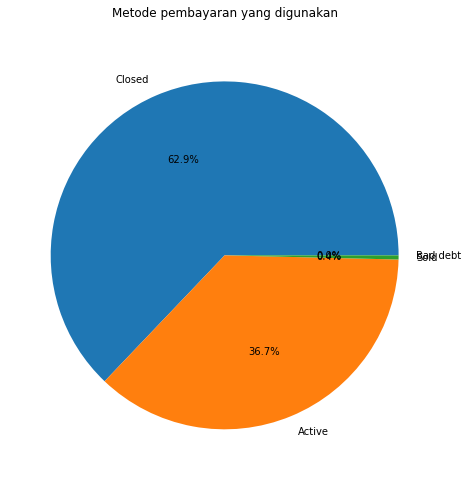

In [15]:
fig = plt.figure(figsize=(12, 8))

payment_type = bur.groupby('CREDIT_ACTIVE')['SK_ID_CURR'].count().reset_index()
payment_type = payment_type.rename(columns = {'SK_ID_CURR':'total_order'}).sort_values(by = 'total_order', ascending = False)
plt.pie(x = payment_type['total_order'], labels = payment_type['CREDIT_ACTIVE'], autopct='%1.1f%%')
plt.title(f"Keaktifan Kredit\n")
plt.show()

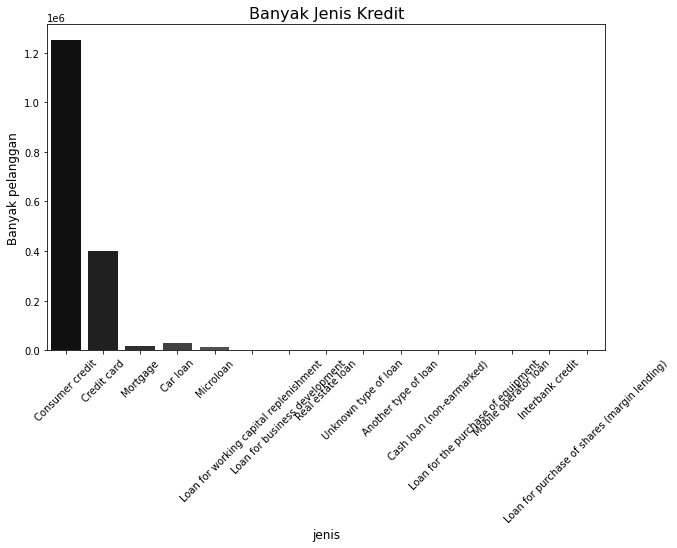

In [26]:
f,ax = plt.subplots(figsize=(10, 6))
bur.isna().sum()

sns.countplot(x='CREDIT_TYPE', data=bur, palette='gist_yarg_r', )
for tick in ax.get_xticklabels():
    tick.set_rotation(45) 
ax.set_title('Banyak Jenis Kredit', fontsize=16)
ax.set_xlabel('jenis', fontsize=12)
ax.set_ylabel('Banyak pelanggan', fontsize=12)
plt.show()

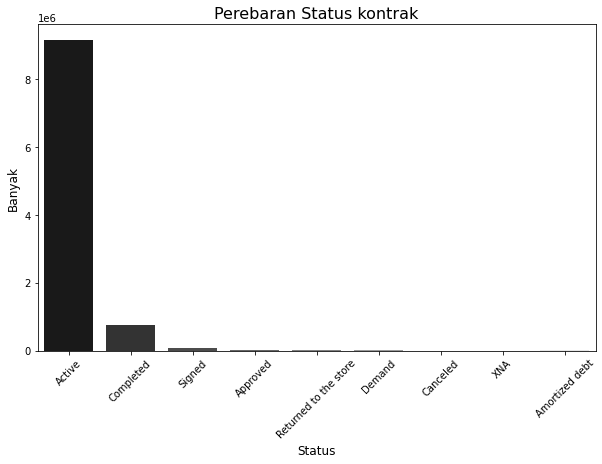

In [27]:
f,ax = plt.subplots(figsize=(10, 6))


sns.countplot(x='NAME_CONTRACT_STATUS', data=cash_bal, palette='gist_yarg_r', )
for tick in ax.get_xticklabels():
    tick.set_rotation(45) 
ax.set_title('Persebaran Status kontrak', fontsize=16)
ax.set_xlabel('Status', fontsize=12)
ax.set_ylabel('Banyak', fontsize=12)
plt.show()

In [39]:
prev_app.head()
#prev_app.info()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,17145.0,SATURDAY,15,Y,1,XAP,Approved,...,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle
1,2802425,108129,Cash loans,607500.0,THURSDAY,11,Y,1,XNA,Approved,...,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action
2,2523466,122040,Cash loans,112500.0,TUESDAY,11,Y,1,XNA,Approved,...,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high
3,2819243,176158,Cash loans,450000.0,MONDAY,7,Y,1,XNA,Approved,...,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle
4,1784265,202054,Cash loans,337500.0,THURSDAY,9,Y,1,Repairs,Refused,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high


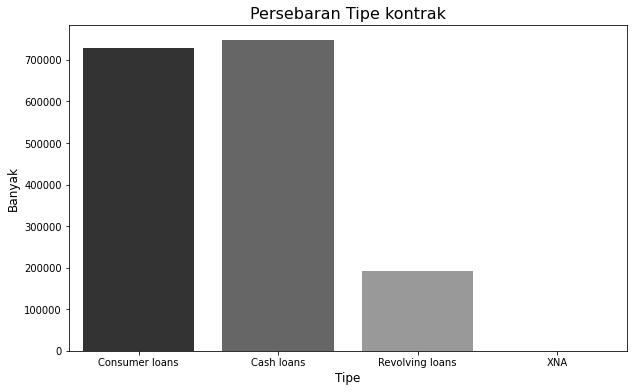

In [33]:
f,ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='NAME_CONTRACT_TYPE', data=prev_app, palette='gist_yarg_r', )

ax.set_title('Persebaran Tipe kontrak', fontsize=16)
ax.set_xlabel('Tipe', fontsize=12)
ax.set_ylabel('Banyak', fontsize=12)
plt.show()

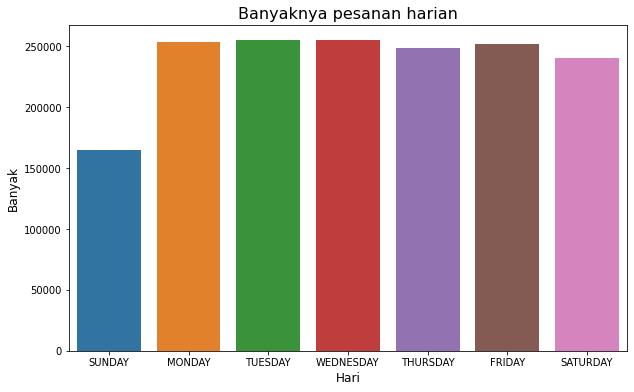

In [36]:
f,ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data=prev_app, order=['SUNDAY','MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY'] )

ax.set_title('Banyaknya pesanan harian', fontsize=16)
ax.set_xlabel('Hari', fontsize=12)
ax.set_ylabel('Banyak', fontsize=12)
plt.show()

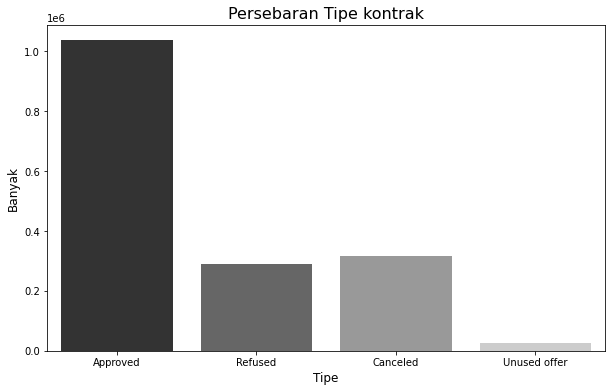

In [38]:
f,ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='NAME_CONTRACT_STATUS', data=prev_app, palette='gist_yarg_r', )

ax.set_title('Persebaran Tipe kontrak', fontsize=16)
ax.set_xlabel('Tipe', fontsize=12)
ax.set_ylabel('Banyak', fontsize=12)
plt.show()

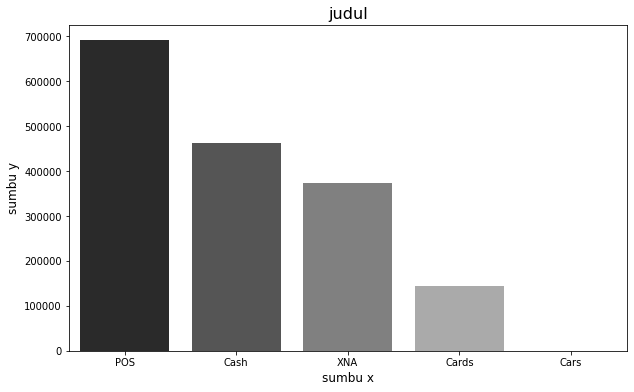

In [40]:
f,ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='NAME_PORTFOLIO', data=prev_app, palette='gist_yarg_r', )

ax.set_title('judul', fontsize=16)
ax.set_xlabel('sumbu x', fontsize=12)
ax.set_ylabel('sumbu y', fontsize=12)
plt.show()

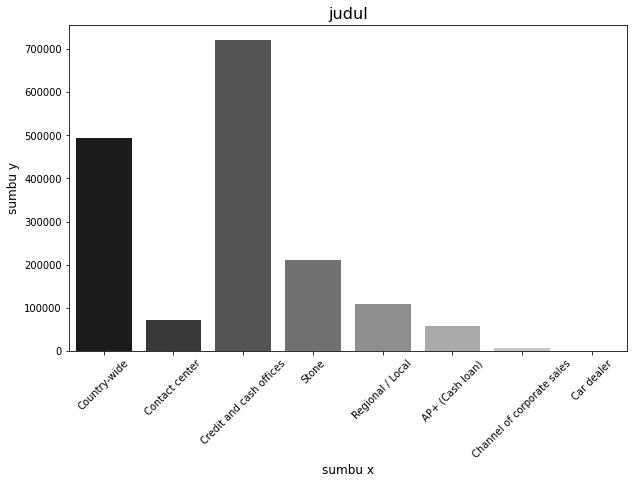

In [45]:
f,ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='CHANNEL_TYPE', data=prev_app, palette='gist_yarg_r', )
for tick in ax.get_xticklabels():
    tick.set_rotation(45) 
    
ax.set_title('judul', fontsize=16)
ax.set_xlabel('sumbu x', fontsize=12)
ax.set_ylabel('sumbu y', fontsize=12)
plt.show()

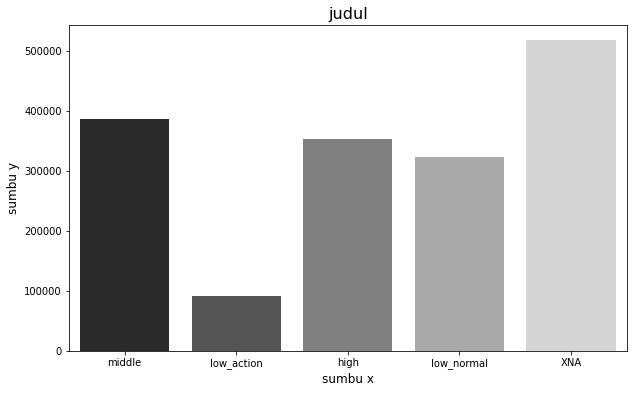

In [44]:
f,ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='NAME_YIELD_GROUP', data=prev_app, palette='gist_yarg_r', )

ax.set_title('judul', fontsize=16)
ax.set_xlabel('sumbu x', fontsize=12)
ax.set_ylabel('sumbu y', fontsize=12)
plt.show()

In [10]:
#cp=cash_bal.merge(prev_app,on='SK_ID_PREV',how='inner')
#cpi=cp.merge(inst_pay,on='SK_ID_PREV',how='inner')
#cpic=cpi.merge(cre_cardbal,on="SK_ID_PREV",how='inner')
#cpicb=cpic.merge(bur,on='SK_ID_CURR',how="inner")
#cpicbb=cpicb.merge(bur_b,on='SK_ID_BUREAU',how="inner")

#test=cpicbb.merge(app_test,on='SK_ID_CURR',how="inner")
#train=cpicbb.merge(app_train,on='SK_ID_CURR',how="inner")